In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from pandas.testing import assert_frame_equal
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

In [2]:
p1 = Path.cwd() / 'data'

In [3]:
fueleco = pd.read_csv(p1 / 'vehicles.csv.zip', parse_dates=['createdOn', 'modifiedOn'])
fueleco.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_12764\3919698033.py:1: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types. Specify dtype option on import or set low_memory=False.
  fueleco = pd.read_csv(p1 / 'vehicles.csv.zip', parse_dates=['createdOn', 'modifiedOn'])
C:\Users\admin\AppData\Local\Temp\ipykernel_12764\3919698033.py:1: FutureWarning: Parsed string "Tue Jan 01 00:00:00 EST 2013" included an un-recognized timezone "EST". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  fueleco = pd.read_csv(p1 / 'vehicles.csv.zip', parse_dates=['createdOn', 'modifiedOn'])
C:\Users\admin\AppData\Local\Temp\ipykernel_12764\3919698033.py:1: FutureWarning: Parsed string "Tue Jan 01 00:00:00 EST 2013" included an un-recognized timezone "EST". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [4]:
createdOn_time = pd.to_datetime(fueleco['createdOn'].str.slice(4, 10) + ' ' + fueleco['createdOn'].str.slice(24, 28))
modifiedOn_time = pd.to_datetime(fueleco['modifiedOn'].str.slice(4, 10) + ' ' + fueleco['modifiedOn'].str.slice(24, 28))

In [5]:
fueleco = (fueleco.assign(createdOn=createdOn_time, modifiedOn=modifiedOn_time))
fueleco.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,2013-01-01,2013-01-01,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,2013-01-01,2013-01-01,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,2013-01-01,2013-01-01,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,2013-01-01,2013-01-01,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,2013-01-01,2013-01-01,NaN,0,0,0


In [6]:
fueleco.dtypes, fueleco.dtypes.value_counts()

(barrels08            float64
 barrelsA08           float64
 charge120            float64
 charge240            float64
 city08                 int64
                    ...      
 modifiedOn    datetime64[ns]
 startStop             object
 phevCity               int64
 phevHwy                int64
 phevComb               int64
 Length: 83, dtype: object,
 float64           32
 int64             27
 object            21
 datetime64[ns]     2
 bool               1
 Name: count, dtype: int64)

In [7]:
fueleco['make'].nunique(), fueleco['model'].nunique()

(134, 3816)

In [8]:
fueleco['drive'].isna().mean() * 100

3.0408429451932175

In [9]:
fueleco['drive'].value_counts(dropna=False)

drive
Front-Wheel Drive             13653
Rear-Wheel Drive              13284
4-Wheel or All-Wheel Drive     6648
All-Wheel Drive                2401
4-Wheel Drive                  1221
NaN                            1189
2-Wheel Drive                   507
Part-time 4-Wheel Drive         198
Name: count, dtype: int64

<AxesSubplot:xlabel='make'>

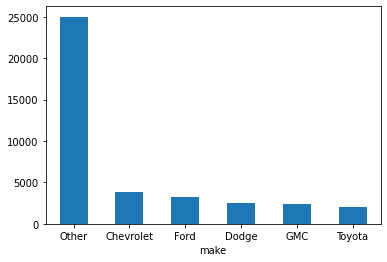

In [10]:
top_n = fueleco['make'].value_counts().index[:5]
top_n_data = fueleco.assign(make=fueleco['make'].where(fueleco['make'].isin(top_n), 'Other'))['make'].value_counts()
top_n_data.plot.bar(rot=0)

c:\Users\admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<AxesSubplot:xlabel='make', ylabel='count'>

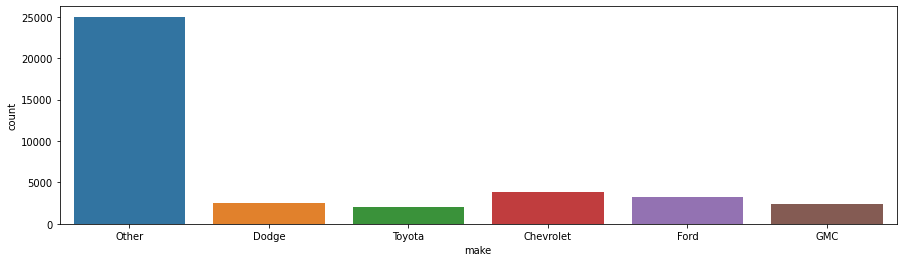

In [11]:
top_n_data2 = fueleco.assign(make=fueleco['make'].where(fueleco['make'].isin(top_n), 'Other'))
fig, ax = plt.subplots(figsize=(15, 4))
sns.countplot(data=top_n_data2, x='make')

c:\Users\admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<AxesSubplot:xlabel='make', ylabel='count'>

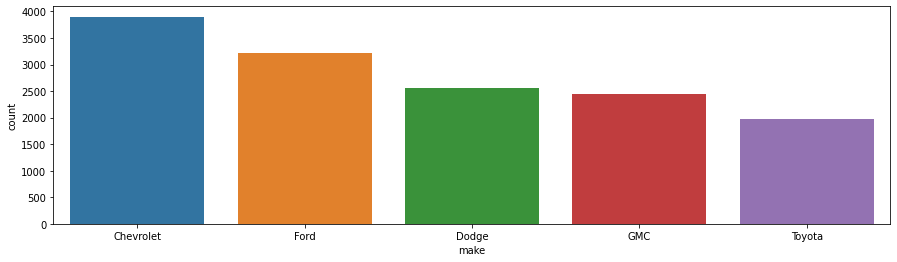

In [12]:
fig, ax = plt.subplots(figsize=(15, 4))
sns.countplot(data=fueleco, x='make', order=top_n)

In [13]:
fueleco['rangeA'].value_counts()

rangeA
290            74
270            56
280            53
310            41
277            38
               ..
351             1
240/290/290     1
303             1
340-350         1
341             1
Name: count, Length: 216, dtype: int64

In [14]:
(fueleco['rangeA']
 .str.extract(r'([^0-9.])')
 .dropna()
 #.apply(lambda row: ''.join(row), axis=1)
 .squeeze()
 .value_counts()
)

0
/    280
-     71
Name: count, dtype: int64

In [15]:
fueleco['rangeA'].isna().sum()

37616

In [16]:
(fueleco['rangeA']
 .fillna('0')
 .str.replace('-', '/')
 .str.split('/', expand=True)
 .astype('float')
 .mean(axis=1)
 .pipe(lambda ser: pd.cut(ser, bins=10, labels=[0, 50, 100, 150, 200, 250, 300, 350, 400, 450]))
 .value_counts()
)

0      37688
300      559
350      352
400      205
250      181
450       82
100       12
200        9
50         8
150        5
Name: count, dtype: int64

In [17]:
(fueleco['city08']
 .pipe(lambda ser: pd.qcut(ser, q=10))
 .value_counts()
)

city08
(5.999, 13.0]    5939
(19.0, 21.0]     4477
(14.0, 15.0]     4381
(17.0, 18.0]     3912
(16.0, 17.0]     3881
(15.0, 16.0]     3855
(21.0, 24.0]     3676
(24.0, 150.0]    3235
(13.0, 14.0]     2898
(18.0, 19.0]     2847
Name: count, dtype: int64

In [18]:
fueleco.select_dtypes(include='number').shape

(39101, 59)

In [19]:
fueleco['city08'].describe().T

count    39101.000000
mean        18.077799
std          6.970672
min          6.000000
25%         15.000000
50%         17.000000
75%         20.000000
max        150.000000
Name: city08, dtype: float64

<AxesSubplot:>

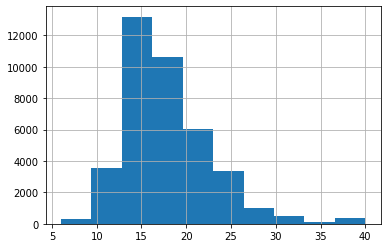

In [20]:
fueleco['city08'].clip(upper=40).hist()

<AxesSubplot:>

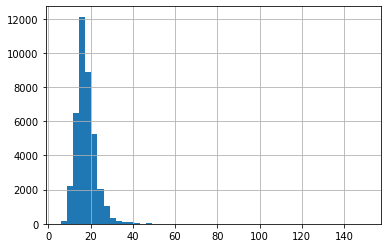

In [21]:
fueleco['city08'].hist(bins=50)

<AxesSubplot:>

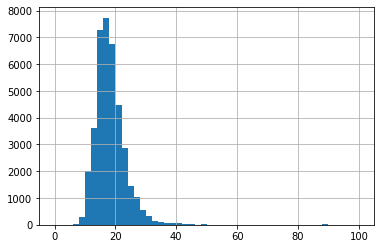

In [22]:
fueleco['city08'].hist(bins=50, range=(0, 100))

c:\Users\admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


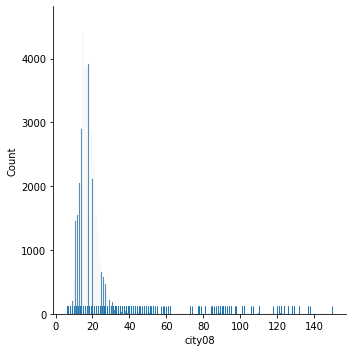

In [23]:
sns.displot(fueleco['city08'], rug=True)

c:\Users\admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<AxesSubplot:ylabel='city08'>

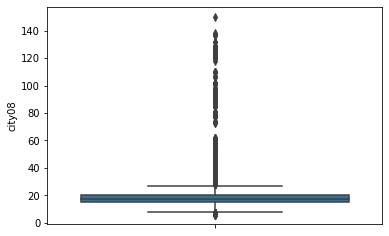

In [24]:
sns.boxplot(data=fueleco, y='city08')

In [25]:
ss.kstest(fueleco['city08'], cdf='norm')

KstestResult(statistic=0.9999999990134123, pvalue=0.0, statistic_location=6, statistic_sign=-1)

((array([-4.1352692 , -3.92687024, -3.81314873, ...,  3.81314873,
          3.92687024,  4.1352692 ]),
  array([  6,   6,   6, ..., 137, 138, 150], dtype=int64)),
 (5.385946629915974, 18.077798521776934, 0.772587941459713))

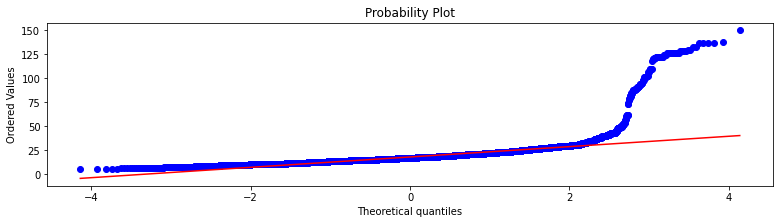

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(13, 3))
ss.probplot(fueleco['city08'], plot=ax)

In [27]:
brand = ['Ford', 'Honda', 'Tesla', 'BMW']
mask = fueleco['make'].isin(brand)
fueleco[mask].groupby('make')['city08'].agg(['mean', 'std'])

,mean,std
make,,
BMW,17.817377,7.372907
Ford,16.853803,6.701029
Honda,24.372973,9.154064
Tesla,92.826087,5.538970


c:\Users\admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<AxesSubplot:xlabel='city08', ylabel='make'>

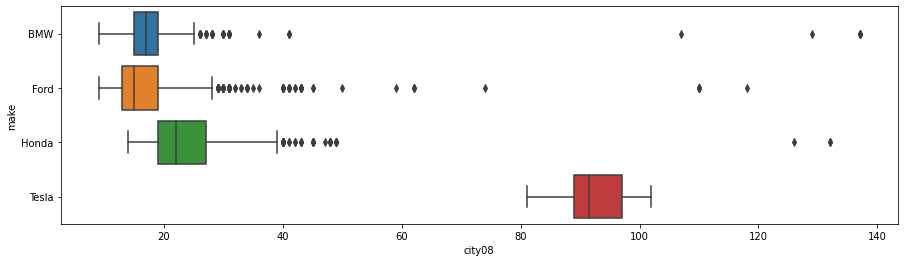

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
sns.boxplot(data=fueleco[mask], y='make', x='city08')

In [29]:
fueleco[mask]['make'].value_counts()

make
Ford     3208
BMW      1807
Honda     925
Tesla      46
Name: count, dtype: int64

c:\Users\admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<AxesSubplot:xlabel='make', ylabel='city08'>

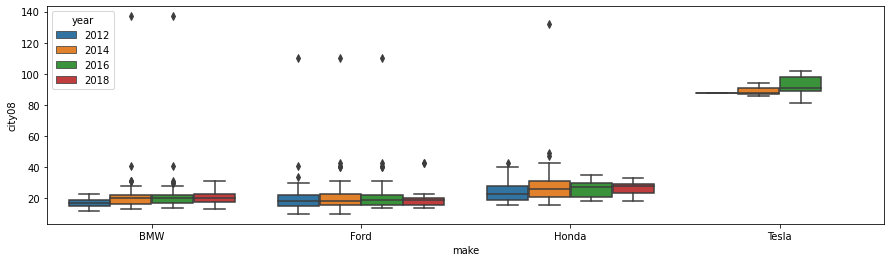

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
sns.boxplot(data=fueleco[mask], x='make', y='city08', hue='year', hue_order=[2012, 2014, 2016, 2018])

In [31]:
fueleco['city08'].corr(fueleco['highway08'])

0.932494506228495

<AxesSubplot:>

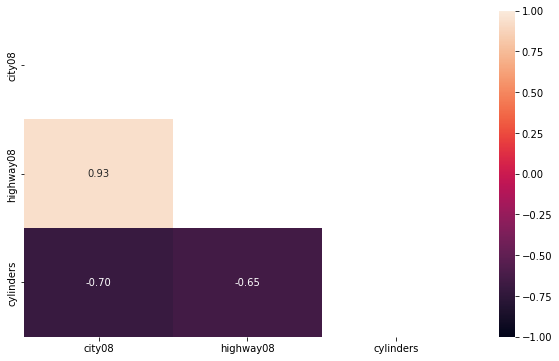

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
corr = fueleco[['city08', 'highway08', 'cylinders']].corr()
mask = np.zeros_like(corr, dtype='bool')
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, fmt='.2f', annot=True, vmin=-1, vmax=1, ax=ax)

<Figure size 720x432 with 0 Axes>

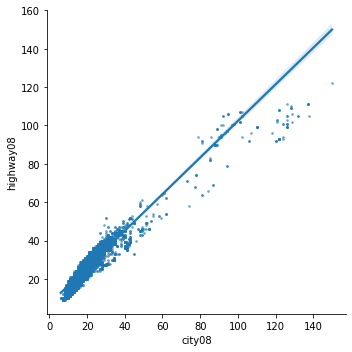

In [33]:
fig = plt.figure(figsize=(10, 6))
sns.lmplot(data=fueleco, x='city08', y='highway08', scatter_kws={'s':3, 'alpha':0.5})

c:\Users\admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<AxesSubplot:xlabel='city08', ylabel='highway08'>

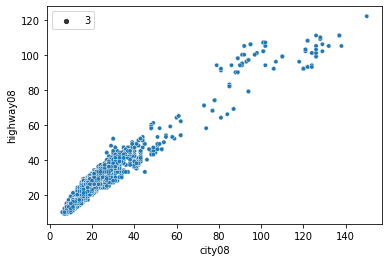

In [34]:
sns.scatterplot(data=fueleco, x='city08', y='highway08', size=3)

c:\Users\admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

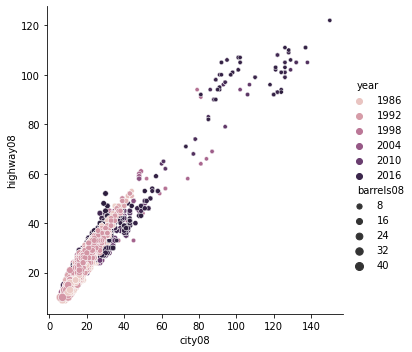

In [35]:
res = sns.relplot(data=fueleco, x='city08', y='highway08', hue='year', size='barrels08')

In [36]:
def generalize(ser, match_name, default):
    seen = None
    for match, name in match_name:
        mask = ser.str.contains(match)
        if seen is None:
            seen = mask
        else:
            seen |= mask
        ser = ser.where(~mask, name)
    ser = ser.where(seen, default)
    return ser

In [40]:
makes = ['Ford', 'Tesla', 'BMW', 'Toyota']
match_name = [('Seaters', 'Car'), ('Car', 'Car'), ('Utility', 'SUV'),
     ('Truck', 'Truck'), ('Van', 'Van'), ('van', 'Van'),
     ('Wagon', 'Wagon')]

In [42]:
data = (fueleco[fueleco['make'].isin(makes)]
        .assign(SClass=lambda df: generalize(df.VClass, match_name, 'Other'))
)
data['SClass'].value_counts()

SClass
Car      3441
Truck    1518
SUV       916
Van       426
Wagon     379
Other     357
Name: count, dtype: int64

In [46]:
(data.groupby(['make', 'SClass']).size()
 .unstack(fill_value=0)
 .reindex(['Car', 'SUV', 'Truck', 'Van', 'Wagon', 'Other'], axis=1)
)

SClass,Car,SUV,Truck,Van,Wagon,Other
make,,,,,,
BMW,1557,158,0,0,92,0
Ford,1075,372,1040,332,155,234
Tesla,36,10,0,0,0,0
Toyota,773,376,478,94,132,123


In [48]:
(pd.crosstab(data['make'], data['SClass'])
 .reindex(['Car', 'SUV', 'Truck', 'Van', 'Wagon', 'Other'], axis=1)
)

SClass,Car,SUV,Truck,Van,Wagon,Other
make,,,,,,
BMW,1557,158,0,0,92,0
Ford,1075,372,1040,332,155,234
Tesla,36,10,0,0,0,0
Toyota,773,376,478,94,132,123


<AxesSubplot:xlabel='make'>

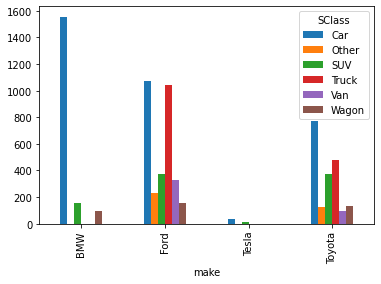

In [51]:
(data
 .pipe(lambda df: pd.crosstab(df['make'], df['SClass']))
 .plot.bar()
)

c:\Users\admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

<AxesSubplot:xlabel='make', ylabel='count'>

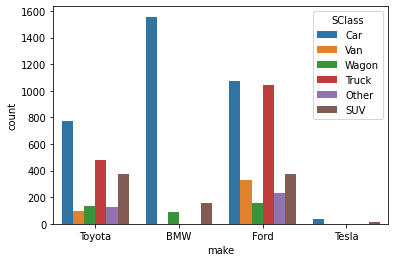

In [52]:
sns.countplot(data=data, x='make', hue='SClass')

<AxesSubplot:xlabel='make'>

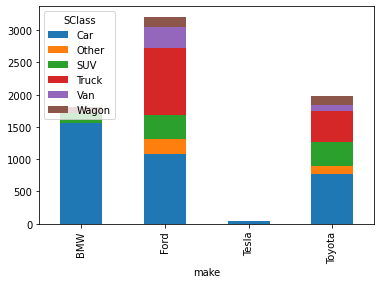

In [53]:
(data
 .pipe(lambda df: pd.crosstab(df['make'], df['SClass']))
 .plot.bar(stacked=True)
)

<AxesSubplot:xlabel='make'>

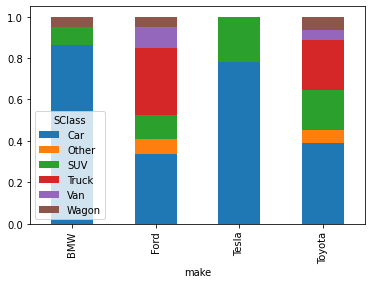

In [57]:
(data
 .pipe(lambda df: pd.crosstab(df['make'], df['SClass']))
 .pipe(lambda df: df.div(df.sum(axis=1), axis=0))
 .plot.bar(stacked=True)
)